In [1]:
# minist dataset: http://yann.lecun.com/exdb/mnist/

from torchvision.datasets import MNIST
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


%matplotlib inline

In [2]:
train = MNIST("./data/", train=True, download=True) #60000
test= MNIST("./data/",train=False, download=True) #10000

label:  5
size:  (28, 28)


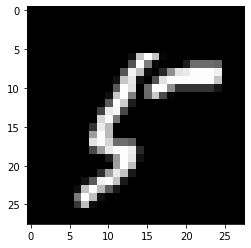

In [3]:
# show random train sample
num = np.random.randint(len(train))

plt.imshow(train[num][0], cmap='gray')
print("label: ", train[num][1])

print("size: ", train[num][0].size)

In [4]:
# define net


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #layers
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
    
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        # forward process
        print("input shape: ", x.shape)
        x = self.conv1(x)
        print("conv1 output shape: ", x.shape)
        x = F.relu(x)
        
        x = self.conv2(x)
        print("conv2 output shape: ", x.shape)
        x = F.relu(x)
        print(">_ F.max_pool2d(x, 2, stride=1) output shape: ", F.max_pool2d(x, 2, stride=1).shape)
        x = F.max_pool2d(x, 2)
        print("max_pool2d output shape: ", x.shape)
        # checking
        temp = x
        
        print(x)
        x = self.dropout1(x)
        x = torch.flatten(x,1)
        print("flatten output shape: ", x.shape)
        print(torch.flatten(x,1))
        print(torch.flatten(x,0))
        x = self.fc1(x)
        print("fc1 output shape: ", x.shape)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        print("fc2 output shape: ", x.shape)
        
        output  = F.log_softmax(x, dim=1)
        return output,temp
        

In [5]:
random_data = torch.rand((1, 1, 28, 28))

my_nn = Net()
result, fc_input = my_nn(random_data)
# print (result.shape)
# print (result)

input shape:  torch.Size([1, 1, 28, 28])
conv1 output shape:  torch.Size([1, 32, 26, 26])
conv2 output shape:  torch.Size([1, 64, 24, 24])
>_ F.max_pool2d(x, 2, stride=1) output shape:  torch.Size([1, 64, 23, 23])
max_pool2d output shape:  torch.Size([1, 64, 12, 12])
tensor([[[[0.2804, 0.3602, 0.3857,  ..., 0.3131, 0.3892, 0.3028],
          [0.3498, 0.3303, 0.3797,  ..., 0.3301, 0.2815, 0.2565],
          [0.2582, 0.2928, 0.3822,  ..., 0.3693, 0.2908, 0.3125],
          ...,
          [0.3068, 0.3148, 0.2868,  ..., 0.2912, 0.3020, 0.2978],
          [0.3279, 0.2731, 0.2663,  ..., 0.3418, 0.3689, 0.3130],
          [0.3525, 0.3422, 0.3215,  ..., 0.2871, 0.3547, 0.3422]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0101, 0.0293],
          [0.0594, 0.0319, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [6]:
fc_input.shape
fc1 = nn.Linear(9216, 128)

### param of Conv2d
(height, width)
* stride： 卷积核移动步长
* padding： padding size
* dilation: 感受野散开程度 （[可视化](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)）
* groups: 分组卷积 ([Blog](https://www.cnblogs.com/shine-lee/p/10243114.html))
* padding_mode: padding模式([Blog](https://blog.csdn.net/hyk_1996/article/details/94447302))

### param of MaxPool2d
(height, width)
* stride： 卷积核移动步长, 默认None, 即和kernel_size相同
* padding： padding size
* dilation: 感受野散开程度 （[可视化](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)）

卷积/池化输出尺寸:
```python
import math

in_w, in_h =28, 28

pad_h, pad_w = 0, 0
dil_h, dil_w = 1, 1 # default is 1
s_h, s_w = 1, 1 # default is 0
k_h, k_w = 3, 3

#output featuremap size height
out_h = math.floor( (in_h + 2*pad_h - dil_h*(k_h-1) - 1)/s_h + 1)
#output featuremap size width
out_w = math.floor( (in_w + 2*pad_w - dil_w*(k_w-1) - 1)/s_w + 1)
print(out_h)
print(out_w)
```
